In [80]:
!pip install keras tensorflow
!pip install sentiment_analysis_spanis
import os
import tweepy 
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk.corpus import stopwords
from nltk import bigrams
import re
import networkx as nx
from sentiment_analysis_spanish import sentiment_analysis

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [81]:
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print(f"getting tweets before {oldest}")
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print(f"...{len(alltweets)} tweets downloaded so far")
    
    #transform the tweepy tweets into a 2D array that will populate the csv 
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]
    
    #write the csv  
    with open(f'/content/drive/MyDrive/latam/twitter/newssites/{screen_name}_tweets.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)
    
    pass




In [82]:
consumer_key= ''
consumer_secret= ''
access_key= ''
access_secret= ''

In [83]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
#https://docs.tweepy.org/en/v3.6.0/index.html


Read in list of news sites into a dataframe

In [84]:
# returns pandas series if there is only one column
df = pd.read_csv("/content/drive/MyDrive/latam/twitter/newssites.csv", squeeze = True)

In [36]:
#iterate through series 
for row in df:
    #print(row)
    get_all_tweets(row)

getting tweets before 1492921520653406208
...400 tweets downloaded so far
getting tweets before 1490893814059446273
...600 tweets downloaded so far
getting tweets before 1488726368900706305
...800 tweets downloaded so far
getting tweets before 1486896825252691968
...1000 tweets downloaded so far
getting tweets before 1485004343736561666
...1200 tweets downloaded so far
getting tweets before 1483122383519203333
...1400 tweets downloaded so far
getting tweets before 1481262185837912064
...1600 tweets downloaded so far
getting tweets before 1479103209520209922
...1800 tweets downloaded so far
getting tweets before 1476780157172129791
...2000 tweets downloaded so far
getting tweets before 1474414564838019080
...2200 tweets downloaded so far
getting tweets before 1472588784311144449
...2400 tweets downloaded so far
getting tweets before 1470506314451369984
...2600 tweets downloaded so far
getting tweets before 1468237613819596799
...2800 tweets downloaded so far
getting tweets before 146579

In [37]:
#if __name__ == '__main__':
	#pass in the username of the account you want to download
	#get_all_tweets("lajornadaonline")

Analyze one news channel for word count, cleaning, stopword removal, most commmon words , sentiment analysys 

In [85]:
#read one csv to a list for analysis 
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/
df_news = pd.read_csv("/content/drive/MyDrive/latam/twitter/newssites/@AztecaNoticias_tweets.csv", squeeze = True)



In [86]:
df_news.head()

,id,created_at,text
0,1494833258776907780,2022-02-19 00:36:36,.@LaAgenciaCDMX y @SSaludCdMx informan que el ...
1,1494831777072009222,2022-02-19 00:30:42,Se llevará a cabo un programa de actividades p...
2,1494831610365100033,2022-02-19 00:30:03,#AlertaVialFIA | Un taxi chocó contra el Tren ...
3,1494831531579346946,2022-02-19 00:29:44,El Senado aprobó en comisiones la minuta que e...
4,1494827100825608195,2022-02-19 00:12:08,"Ignacio Mier, líder de Morena en la Cámara de ..."


In [87]:
texts = df_news['text']


In [88]:
#remove any text that should not be analyzed 
#([^0-9A-Za-z \t])|(\w+:\/\/\S+)
#can be modified to remove any text 

def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


#all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
#all_tweets_no_urls[:5]


In [90]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in texts]


All words across all tweets for the channel : all_words

In [92]:
# List of all words across tweets
all_words = list(itertools.chain(*words_in_tweet))


In [94]:
# Create counter
counts = collections.Counter(all_words)


In [95]:
clean_tweets = pd.DataFrame(counts.most_common(15), columns=['words', 'count'])

clean_tweets.head()

,words,count
0,de,4573
1,la,2714
2,en,2232
3,el,2222
4,que,1304


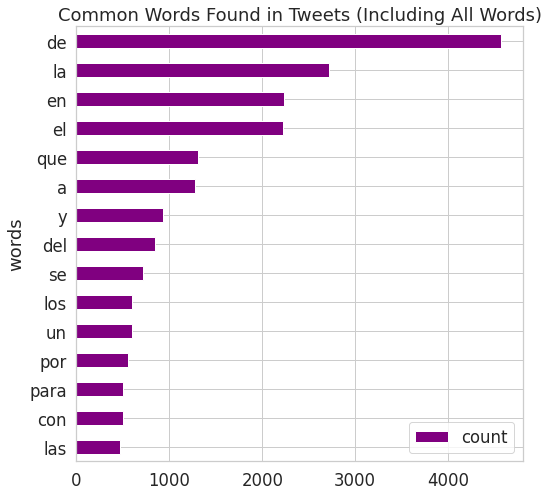

In [96]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [97]:
#remove stopwords 
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
# View a few words from the set
list(stop_words)[0:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [99]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['.@laagenciacdmx',
 '@ssaludcdmx',
 'informan',
 'domingo',
 '20',
 'febrero',
 'último',
 'día',
 'realizarán',
 'prueba…',
 'https://t.co/k0jgo8kbx4']

In [100]:
#compare to tweet with stop words 
words_in_tweet[0]

['.@laagenciacdmx',
 'y',
 '@ssaludcdmx',
 'informan',
 'que',
 'el',
 'domingo',
 '20',
 'de',
 'febrero',
 'es',
 'el',
 'último',
 'día',
 'en',
 'el',
 'que',
 'se',
 'realizarán',
 'prueba…',
 'https://t.co/k0jgo8kbx4']

In [101]:
all_words_nsw = list(itertools.chain(*tweets_nsw)) # use to anaye sentiment using text blob 
counts_nsw = collections.Counter(all_words_nsw)
counts_nsw.most_common(15)

[('|', 441),
 ('#enlamañanera', 339),
 ('presidente', 337),
 ('@lopezobrador_', 242),
 ('mil', 184),
 ('años', 155),
 ('gobierno', 128),
 ('así', 128),
 ('de…', 109),
 ('méxico', 102),
 ('millones', 101),
 ('#cdmx', 95),
 ('personas', 94),
 ('tras', 87),
 ('informó', 82)]

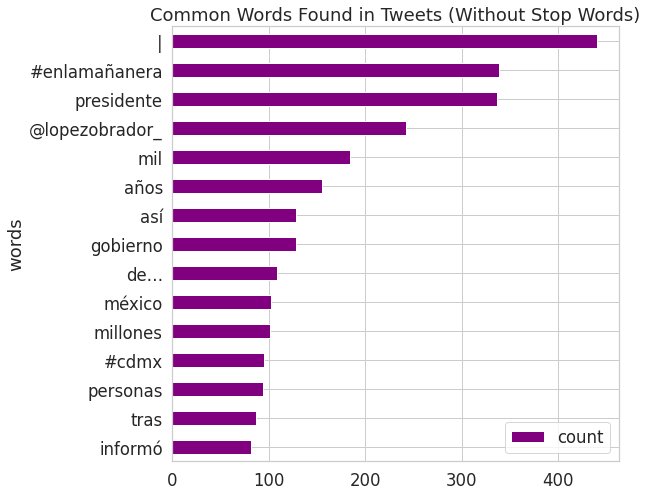

In [102]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [103]:
#remove any other words that are not relevant 
collection_words = []

In [104]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [106]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('|', 441),
 ('#enlamañanera', 339),
 ('presidente', 337),
 ('@lopezobrador_', 242),
 ('mil', 184),
 ('años', 155),
 ('gobierno', 128),
 ('así', 128),
 ('de…', 109),
 ('méxico', 102),
 ('millones', 101),
 ('#cdmx', 95),
 ('personas', 94),
 ('tras', 87),
 ('informó', 82)]

Number of unique words across all tweets 

In [107]:
#number of unique words across all tweets 
len(tweets_nsw_nc)

3250

In [108]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,|,441
1,#enlamañanera,339
2,presidente,337
3,@lopezobrador_,242
4,mil,184


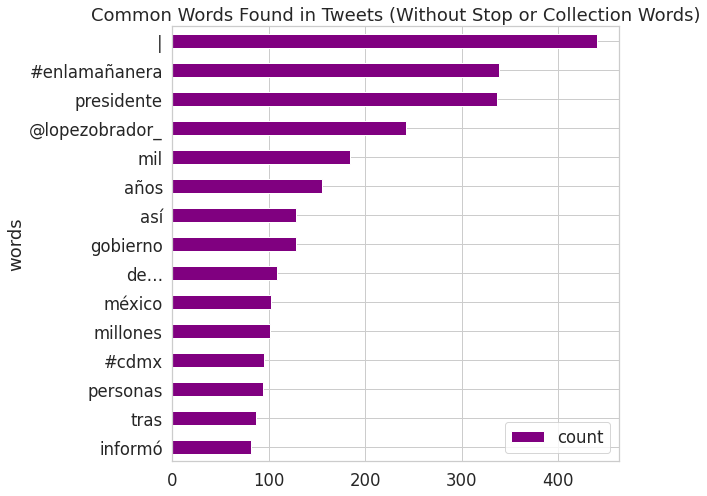

In [109]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

Bigram analysis 

In [110]:
#create a list of bigrams in the tweets
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('.@laagenciacdmx', '@ssaludcdmx'),
 ('@ssaludcdmx', 'informan'),
 ('informan', 'domingo'),
 ('domingo', '20'),
 ('20', 'febrero'),
 ('febrero', 'último'),
 ('último', 'día'),
 ('día', 'realizarán'),
 ('realizarán', 'prueba…'),
 ('prueba…', 'https://t.co/k0jgo8kbx4')]

In [111]:
#top 20 most common bigrams 
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('#enlamañanera', '|'), 338),
 (('presidente', '@lopezobrador_'), 220),
 (('|', 'presidente'), 178),
 (('28', 'años'), 59),
 (('#ethereum,', 'segunda'), 47),
 (('dólares', 'unidad,'), 46),
 (('mercado', 'bursátil'), 45),
 (('unidad,', '#ethereum,'), 45),
 (('inicia', 'jornada'), 33),
 (('nueva', 'york'), 32),
 (('bolsa', 'nueva'), 31),
 (('presidente', 'lópez'), 27),
 (('bursátil', '#méxico'), 27),
 (('lópez', 'obrador'), 26),
 (('segunda', '#criptomoneda'), 26),
 (('york', '(@nyse)'), 26),
 (('así', 'abre'), 26),
 (('abre', 'mercado'), 26),
 (('así', 'inicia'), 26),
 (('jornada', '#precio'), 26)]

In [112]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(#enlamañanera, |)",338
1,"(presidente, @lopezobrador_)",220
2,"(|, presidente)",178
3,"(28, años)",59
4,"(#ethereum,, segunda)",47
5,"(dólares, unidad,)",46
6,"(mercado, bursátil)",45
7,"(unidad,, #ethereum,)",45
8,"(inicia, jornada)",33
9,"(nueva, york)",32


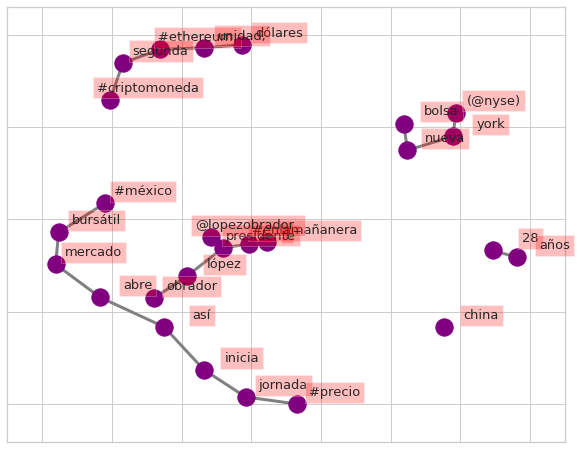

In [113]:
#visualize top occurring bigrams 

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)

fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

Sentiment analysis using TextBlob


In [ ]:
#using all_words_nsw_nc 


Sentiment analysis using sentiment-analysis-spanish
https://pypi.org/project/sentiment-analysis-spanish/



---



In [114]:
!pip install sentiment-analysis-spanish

     |████████████████████████████████| 30.0 MB 1.8 MB/s 


In [115]:
pip install keras tensorflow

     |████████████████████████████████| 462 kB 4.5 MB/s 


In [116]:

sentiment = sentiment_analysis.SentimentAnalysisSpanish()

In [117]:

print(sentiment.sentiment("me gusta la tombola es genial"))
#close to 1 

0.9304396176531412


In [118]:
print(sentiment.sentiment("me parece terrible esto que me estás diciendo"))
#close to 0

2.1830853580533075e-06


The function sentiment(text) returns a number between 0 and 1. This is the probability of string variable text of being "positive". Low probabilities mean that the text is negative (numbers close to 0), high probabilities (numbers close to 1) mean that the text is positive. The space in between corespond to neutral texts.